In [1]:
import torch

In [2]:
a=torch.tensor([7,4,3,2,1])
print(a, a.dtype, a.type())

tensor([7, 4, 3, 2, 1]) torch.int64 torch.LongTensor


In [28]:
b=torch.FloatTensor([0,1,2,3,4])
print(b, b.dtype, b.type())

tensor([0., 1., 2., 3., 4.]) torch.float32 torch.FloatTensor


In [4]:
c=b.type(torch.LongTensor)
print(c, c.dtype, c.type(), c.size(), c.ndimension())

tensor([0, 1, 2, 3, 4]) torch.int64 torch.LongTensor torch.Size([5]) 1


In [44]:
a_col = c.view(5,1)
print(a_col, a_col.dtype, a_col.type(), a_col.size(), a_col.ndimension())

tensor([[0],
        [1],
        [2],
        [3],
        [4]]) torch.int64 torch.LongTensor torch.Size([5, 1]) 2


In [27]:
a_col = torch.reshape(c,(1,5))
print(a_col, a_col.dtype, a_col.type(), a_col.size(), a_col.ndimension())

tensor([[0, 1, 2, 3, 4]]) torch.int64 torch.LongTensor torch.Size([1, 5]) 2


In [7]:
print(a_col[0].item())

0


In [8]:
b_col = a_col[1:4]
print(b_col, b_col.dtype, b_col.type(), b_col.size(), b_col.ndimension())

tensor([[1],
        [2],
        [3]]) torch.int64 torch.LongTensor torch.Size([3, 1]) 2


In [9]:
b_col = a_col[1:4] + 1
print(b_col, b_col.dtype, b_col.type(), b_col.size(), b_col.ndimension())

tensor([[2],
        [3],
        [4]]) torch.int64 torch.LongTensor torch.Size([3, 1]) 2


In [46]:
z = b_col * a_col.T // hadamard product
print(z, z.dtype, z.type(), z.size(), z.ndimension(), z.numel())

tensor([[ 0,  2,  4,  6,  8],
        [ 0,  3,  6,  9, 12],
        [ 0,  4,  8, 12, 16]]) torch.int64 torch.LongTensor torch.Size([3, 5]) 2 15


In [25]:
u = a_col[1:3]
u = torch.reshape(u, (1,-1))
print(u, u.dtype, u.type(), u.size(), u.ndimension())


tensor([[1, 2]]) torch.int64 torch.LongTensor torch.Size([1, 2]) 2


In [32]:
print(b, b.dtype, b.type(), b.size(), b.ndimension())
v = torch.dot(b,b) // shows how two are similar
print(v, v.dtype, v.type(), v.size(), v.ndimension())

tensor([0., 1., 2., 3., 4.]) torch.float32 torch.FloatTensor torch.Size([5]) 1
tensor(30.) torch.float32 torch.FloatTensor torch.Size([]) 0


In [33]:
mean = b.mean()
max = b.max()
print(mean,max)

tensor(2.) tensor(4.)


In [36]:
import numpy as np
x = torch.tensor([0,np.pi/2,np.pi])
y = torch.cos(x)
print(y)

tensor([ 1.0000e+00, -4.3711e-08, -1.0000e+00])


In [37]:
series = torch.linspace(-2,2,steps=5)
print(series)

tensor([-2., -1.,  0.,  1.,  2.])


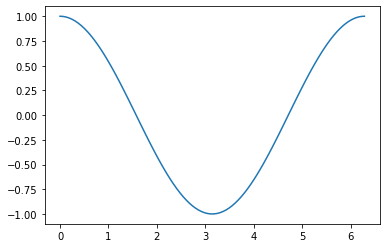

In [42]:
series = torch.linspace(0,np.pi*2,100)
y = torch.cos(series)

import matplotlib.pyplot as plt
# %matplotlib inline
plt.plot(series.numpy(), y.numpy())

In [48]:
u = torch.tensor([[0,1,1],[1,0,1]])
v = torch.tensor([[1,1],[1,1],[-1,1]])
z = torch.mm(u,v)
print(z, z.dtype, z.type(), z.size(), z.ndimension(), z.numel())


tensor([[0, 2],
        [0, 2]]) torch.int64 torch.LongTensor torch.Size([2, 2]) 2 4


In [50]:
u = torch.tensor([[0,1,1],[1,0,1]])
v = u.T
z = torch.mm(u,v)
print(z, z.dtype, z.type(), z.size(), z.ndimension(), z.numel())


tensor([[2, 1],
        [1, 2]]) torch.int64 torch.LongTensor torch.Size([2, 2]) 2 4


In [51]:
u = torch.tensor([[0,1,1],[1,0,1]])
v = u.T
z = torch.dot(u,v)
print(z, z.dtype, z.type(), z.size(), z.ndimension(), z.numel())


RuntimeError: 1D tensors expected, got 2D, 2D tensors at /pytorch/aten/src/TH/generic/THTensorEvenMoreMath.cpp:83